# Analyzing and building prediction models on Pima Indians Diabetes Database

Author: Rajya Laxmi Yellajosyula
-------
Source : https://www.kaggle.com/uciml/pima-indians-diabetes-database/data
-------

# Goal : Predicting accurately if the patients in the dataset have diabetes or not.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database.In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Predictors:
-----------
The datasets consists of several medical predictor variables and one target variable, Outcome. 
Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


This notebook is mainly classified into following sections.

Contents
--------
1. Loading data
2. Data Exploration and visualisation
3. Data cleaning
4. Feature selection
5. Modeling
6. Ensembling

##  Loading data


In [17]:
#Loading data from csv

import pandas as pd
import numpy as np
import spacy as sp

data_frame = pd.read_csv('pima-indians-diabetes-database/diabetes.csv')

In [18]:
#Observing the top entries in the data for various columns

data_frame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Exploration and visualisation

In [19]:
#Check for any missing values
data_frame.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Observation:
------------
There are no missing values in the data set.So no further cleaning is required for missing values.

# Lets see how many diabetes and non-diabetic cases we have in the data

Number of diabetic and non-diabetic observations in the data
Zero - Non Diabetic , one - Diabetic
0    500
1    268
dtype: int64


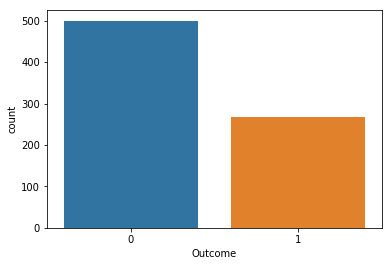

In [20]:
#Plotting of the existing features and their distributions
import matplotlib.pyplot as plt
import seaborn as sns

print('Number of diabetic and non-diabetic observations in the data')
print('Zero - Non Diabetic , one - Diabetic')

print(pd.value_counts(data_frame['Outcome'].values))

sns.countplot(x = 'Outcome',data = data_frame)
plt.show()

As shown above there are about 500 non diabetic and 268 diabetic cases in the data set.
Lets look at the distributions of the predictor variables.

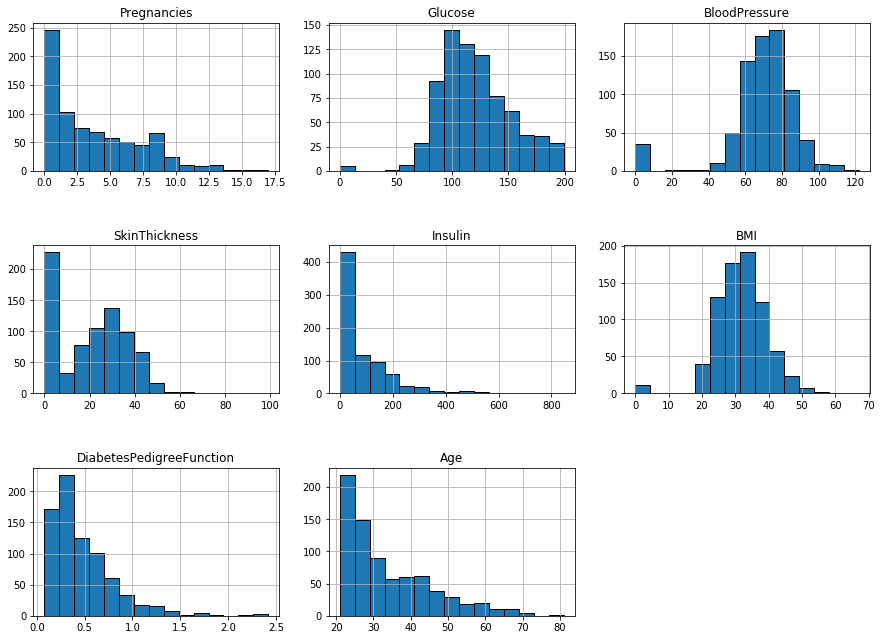

In [21]:
#Plotting all the predictor variables distributions
import itertools

input_cols = data_frame.columns[:8]

plt.subplots(figsize = (15,15))
length = len(input_cols)

for i,j in itertools.zip_longest(input_cols,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data_frame[i].hist(bins = 15,edgecolor='black')
    plt.title(i)
plt.show()


# Statistical summary of the entire data set

In [22]:
data_frame.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


As seen above, the average age of the individual in the data set is 33.
Average BMI is 31.9
Averge Diabetic Pedigree Function 0.47

Lets shift our focus on examining the data points of individuals who are diabetic.

# Summarizing diabetic cases

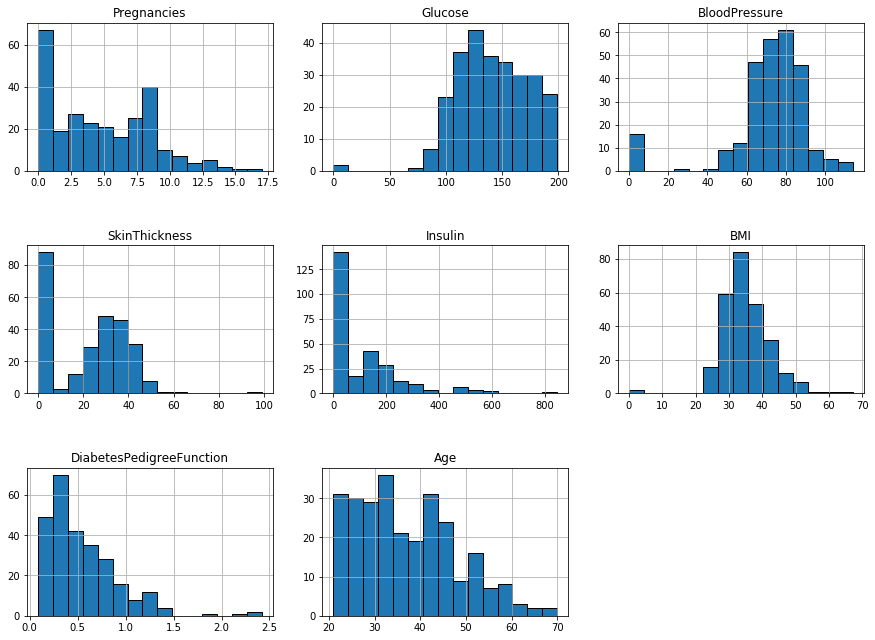

In [23]:
#Diabetic patient data

new_df = data_frame[data_frame['Outcome']==1]

input_cols = new_df.columns[:8]

plt.subplots(figsize = (15,15))
length = len(input_cols)

for i,j in itertools.zip_longest(input_cols,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    new_df[i].hist(bins = 15,edgecolor='black')
    plt.title(i)
plt.show()

In [24]:
new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,268.0,4.865672,3.741239,0.000,1.7500,4.000,8.000,17.00
Glucose,268.0,141.257463,31.939622,0.000,119.0000,140.000,167.000,199.00
BloodPressure,268.0,70.824627,21.491812,0.000,66.0000,74.000,82.000,114.00
SkinThickness,268.0,22.164179,17.679711,0.000,0.0000,27.000,36.000,99.00
Insulin,268.0,100.335821,138.689125,0.000,0.0000,0.000,167.250,846.00
BMI,268.0,35.142537,7.262967,0.000,30.8000,34.250,38.775,67.10
DiabetesPedigreeFunction,268.0,0.550500,0.372354,0.088,0.2625,0.449,0.728,2.42
Age,268.0,37.067164,10.968254,21.000,28.0000,36.000,44.000,70.00
Outcome,268.0,1.000000,0.000000,1.000,1.0000,1.000,1.000,1.00


As seen above, the average age of the individual in the data set who are diabetic is 37.
Average BMI is 35.1
Averge Diabetic Pedigree Function 0.55

# Looking for significant features

In [25]:
#Random Forest Classifier to look at important features

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

X = data_frame[new_df.columns[:8]]
y = data_frame['Outcome']

model.fit(X,y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
#looking at variable importance values
pd.Series(model.feature_importances_,index = X.columns).sort_values(ascending = False)

Glucose                     0.234826
BMI                         0.164407
Age                         0.142671
DiabetesPedigreeFunction    0.139452
BloodPressure               0.091348
Pregnancies                 0.089475
SkinThickness               0.071777
Insulin                     0.066044
dtype: float64

# Observation

Looks like Glucose levels, BMI, DiabetesPedigreeFunction and Age are the significant features contributing to the diabetic condition of an individual.

Lets figure out if there are any correlations in the existing features

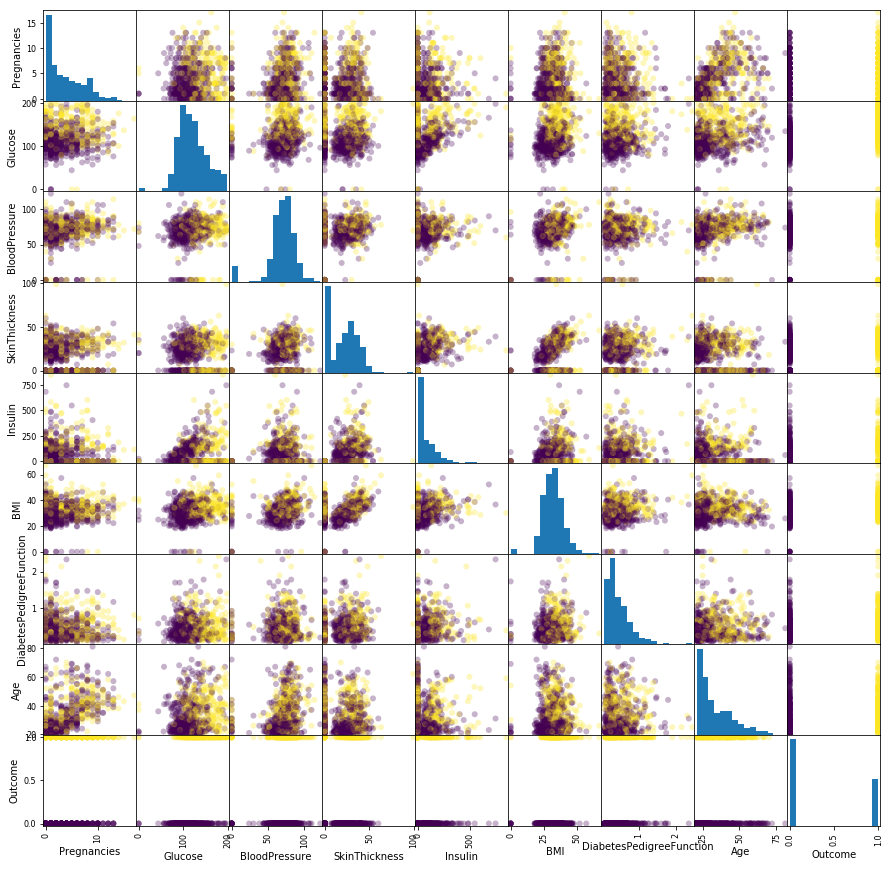

In [27]:
import pandas.plotting


fig = pd.plotting.scatter_matrix(data_frame,c = y,figsize = (15,15),alpha = 0.3, marker='o', hist_kwds={'bins': 15} )
plt.show()

# Observation:
There seems to be no high correlation between the features.Lets look at the correlation coefficients in the form of a heat map
to justify this further.

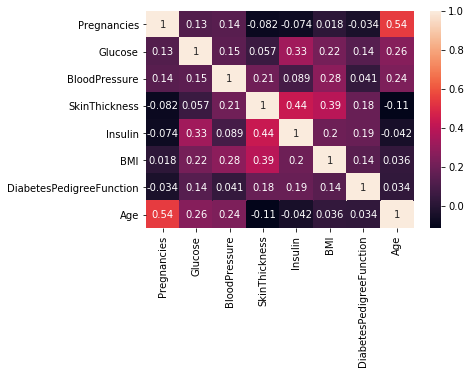

In [28]:
#checking for any correlation between the features

sns.heatmap(data_frame[data_frame.columns[:8]].corr(),annot = True)
figure = plt.gcf()
plt.show()

# Stratification

Before getting started with modeling, we have seen that the data set has more records of non - diabetic patients compared to 
diabetic patients.If we go ahead and train the model by randomly splitting the data, our model might suffer from problem of overfitting based on a single condition.

It means, the training data might have more entries belonging to one condition and when we validate our model against data having dominant other condition, test error might be very high.

To avoid this, I chose to ** stratify ** the data thus having  proportionate amounts of data for both the conditions in test and train data sets.

In [29]:
#stratification
from sklearn.model_selection import train_test_split

#Picking up only significant features
new_dataframe = data_frame[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
train,test = train_test_split(new_dataframe, test_size = 0.30,random_state = 0,stratify = new_dataframe['Outcome'])

In [30]:
X_train = train[train.columns[:4]]
y_train = train['Outcome']

X_test = test[test.columns[:4]]
y_test = test['Outcome']

# Modeling

In [31]:
#Simple logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
predictions = model.predict(X_test)
accuracy = metrics.accuracy_score(predictions,y_test)
print('Accuracy of simple logistic regression is',accuracy)

Accuracy of simple logistic regression is 0.766233766234


In [33]:
#Lets try other classifiers namely SVM,KNN and Decision trees
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

result = []
classifiers = ['Linear Svm','KNN','Decision Tree']

models=[svm.SVC(kernel='linear'),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]

C:\Users\rajya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    result.append(metrics.accuracy_score(prediction,y_test))

new_df = pd.DataFrame(result,index = classifiers)
new_df.columns = ['Accuracy']

In [35]:
new_df.loc['Logistic Regression'] = accuracy
new_df

,Accuracy
Linear Svm,0.787879
KNN,0.722944
Decision Tree,0.675325
Logistic Regression,0.766234


Observation:
------------

SVM is apparently performing better than the other models.Lets try standardizing the data to overcome the problem of high variance in certain features and see if it imporves the performance.

In [36]:
#Standardisation
from sklearn.preprocessing import StandardScaler 
features = new_dataframe[new_dataframe.columns[:4]]

# Gaussian Standardisation
features_standard = StandardScaler().fit_transform(features)

X = pd.DataFrame(features_standard,columns=[['Glucose','BMI','Age','DiabetesPedigreeFunction']])
X['Outcome'] = new_dataframe['Outcome']
outcome = X['Outcome']

train1,test1=train_test_split(X,test_size=0.30,random_state=0,stratify=X['Outcome'])

train_X1=train1[train1.columns[:4]]
test_X1=test1[test1.columns[:4]]

train_Y1=train1['Outcome']
test_Y1=test1['Outcome']

In [37]:
#Lets try running the models on the new standardised data

result = []
classifiers = ['Linear Svm','KNN','Decision Tree','Logistic Regression']

models=[svm.SVC(kernel='linear'),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier(),LogisticRegression()]

In [38]:
for i in models:
    model = i
    model.fit(train_X1,train_Y1)
    prediction=model.predict(test_X1)
    result.append(metrics.accuracy_score(prediction,test_Y1))

models_df = pd.DataFrame(result,index = classifiers)
models_df.columns = ['New Accuracy']

In [39]:
new_df = new_df.merge(models_df,left_index=True,right_index=True,how='left')


In [40]:
new_df

,Accuracy,New Accuracy
Linear Svm,0.787879,0.783550
KNN,0.722944,0.722944
Decision Tree,0.675325,0.701299
Logistic Regression,0.766234,0.783550


  Accuracy of Logistic Regression,decision trees has improved and that of linear SVM has slighlty decreased.

# lets try cross validation to make sure we are not overfitting

In [41]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 

# k=10, split the data into 10 equal parts
kfold = KFold(n_splits=10, random_state=22) 

In [42]:
#train the models again

xyz=[]
accuracy=[]
classifiers=['Linear Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X[X.columns[:4]],X['Outcome'], cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)
    
new_models_dataframe2=pd.DataFrame(result,index=classifiers)   
new_models_dataframe2.columns=['CV Mean']    


In [43]:
new_df = new_df.merge(new_models_dataframe2,left_index=True,right_index=True,how='left')
new_df

,Accuracy,New Accuracy,CV Mean
Linear Svm,0.787879,0.783550,0.783550
KNN,0.722944,0.722944,0.701299
Decision Tree,0.675325,0.701299,0.783550
Logistic Regression,0.766234,0.783550,0.722944


# Lets try Ensembling to build more accurate models

In [44]:
# Ensembling

linear_svc=svm.SVC(kernel='linear',C=0.1,gamma=10,probability=True)
lr=LogisticRegression(C=0.1)
decision_tree = DecisionTreeClassifier()



In [45]:
#SVM and Logistic Regression

from sklearn.ensemble import VotingClassifier 

ensemble_lin_lr=VotingClassifier(estimators=[('Linear_svm', linear_svc), ('Logistic Regression', lr)], 
                       voting='soft', weights=[2,1]).fit(train_X1,train_Y1)
print('The accuracy for Linear SVM and Logistic Regression is:',ensemble_lin_lr.score(test_X1,test_Y1))

The accuracy for Linear SVM and Logistic Regression is: 0.787878787879


In [46]:
#SVM and decision trees

ensemble_lin_dt = VotingClassifier(estimators=[('Linear_svm', linear_svc), ('Decision tree', decision_tree)], 
                       voting='soft', weights=[2,1]).fit(train_X1,train_Y1)
print('The accuracy for Linear SVM and Decision trees is:',ensemble_lin_dt.score(test_X1,test_Y1))


The accuracy for Linear SVM and Decision trees is: 0.744588744589


In [47]:
#Logistic Regression and decision trees

ensemble_dt_lr = VotingClassifier(estimators=[('Logistic Regression', lr), ('Decision tree', decision_tree)], 
                       voting='soft', weights=[2,1]).fit(train_X1,train_Y1)

print('The accuracy for Logistic Regression and Decision trees is:',ensemble_dt_lr.score(test_X1,test_Y1))


The accuracy for Logistic Regression and Decision trees is: 0.718614718615


In [48]:
# All 3 classifiers combined

ensemble_dt_lr_lin = VotingClassifier(estimators=[('Decision tree', decision_tree), ('Logistic Regression', lr),
                                                  ('Linear_svm',linear_svc)], voting='soft', 
                                                weights=[2,1,3]).fit(train_X1,train_Y1)
print('The ensembled model with all the 3 classifiers is:',ensemble_dt_lr_lin.score(test_X1,test_Y1))

The ensembled model with all the 3 classifiers is: 0.74025974026


Results:
-------
From above results, we can see that ensemble model with Linear SVM and logistic regression has highest accuracy of 78.8 when compared to standalone modeling.

# This means, we can predict an individual's diabetic condition based on his health profile having above attributes with an accuracy of 78.8 percentage.


Further Steps and future scope:
-------------------------------
Having more significant features would definetly help in improving the models.
We can also add new features based on existing features as an index of diabetic condition.

The above models can be reused for other similar data sets with minimal or no modifications based on attributes.